In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
from prepare import telco_pipeline

In [3]:
# acquiring, preparing, and adding features to data
# splitting data into train, validate, and test
train, val, test = telco_pipeline()
train.head()

,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,multiple_lines,online_security,...,churn,contract_month,contract_one_year,contract_two_year,internet_dsl,internet_fiber_optic,payment_bank_transfer,payment_credit_card,payment_electronic_check,payment_mailed_check
5609,0,14,76.45,1117.55,True,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2209,0,5,70.00,347.40,True,False,False,True,False,False,...,True,False,True,False,True,False,False,False,False,True
6919,0,35,75.20,2576.20,True,True,False,True,True,False,...,True,True,False,False,False,True,False,False,True,False
2284,0,58,86.10,4890.50,True,True,False,True,True,True,...,False,False,False,True,True,False,False,False,True,False
845,0,2,49.60,114.70,False,False,False,True,False,False,...,True,True,False,False,True,False,False,False,False,True


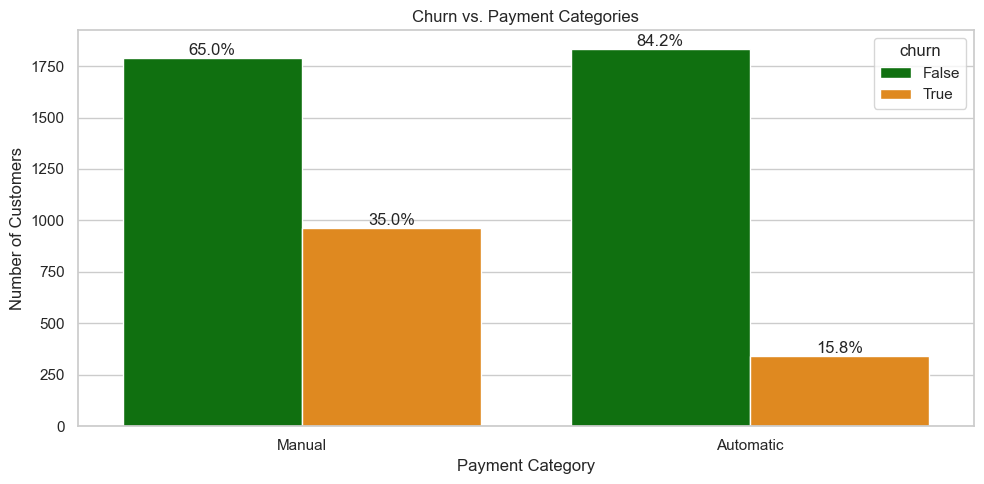

In [4]:
# Assuming 'train' is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

# Create a temporary column for payment categories
train['payment_category'] = train.apply(lambda row: 'Automatic' if row['payment_credit_card'] or row['payment_bank_transfer'] else 'Manual', axis=1)

# Create a bar plot for payment categories and churn rates
ax = sns.countplot(x='payment_category', hue='churn', data=train, palette=["green", "darkorange"])
plt.title("Churn vs. Payment Categories")
plt.xlabel("Payment Category")
plt.ylabel("Number of Customers")

# Calculate percentages and annotate the bars with percentage labels
total_manual = train[train['payment_category'] == 'Manual']['churn'].count()
total_automatic = train[train['payment_category'] == 'Automatic']['churn'].count()

for p in ax.patches:
    if p.get_height() > 0:
        percentage = p.get_height() / total_manual * 100 if p.get_x() < 0.5 else p.get_height() / total_automatic * 100
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')



# Remove the temporary column
train.drop(columns=['payment_category'], inplace=True)

plt.tight_layout()
plt.show()


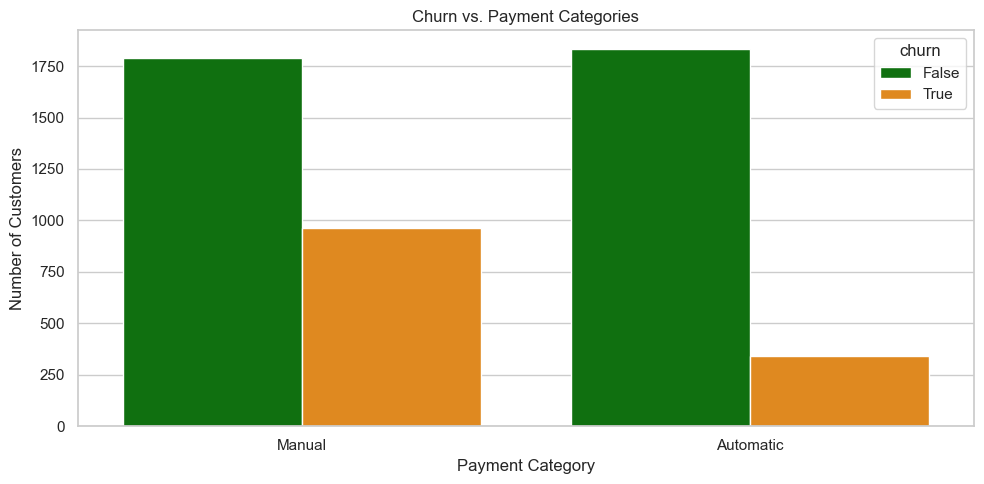

In [9]:
# Assuming 'train' is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

# Create a temporary column for payment categories
train['payment_category'] = train.apply(lambda row: 'Automatic' if row['payment_credit_card'] or row['payment_bank_transfer'] else 'Manual', axis=1)

# Create a bar plot for payment categories and churn rates
ax = sns.countplot(x='payment_category', hue='churn', data=train, palette=["green", "darkorange"])
plt.title("Churn vs. Payment Categories")
plt.xlabel("Payment Category")
plt.ylabel("Number of Customers")

# Calculate percentages and annotate the bars with percentage labels
total_manual = train[train['payment_category'] == 'Manual']['churn'].count()
total_automatic = train[train['payment_category'] == 'Automatic']['churn'].count()

# Calculate percentages and annotate the churned and unchurned bars with percentage labels
for i in range(0, len(ax.patches), 2):  # Churned columns only
    churned_patch = ax.patches[i]
    unchurned_patch = ax.patches[i + 1]
    
    churned_count = churned_patch.get_height()
    unchurned_count = unchurned_patch.get_height()

    if churned_patch.get_x() == 0:  # Manual churned
        percentage = churned_count / unchurned_count * 100
        ax.annotate(f'{percentage:.1f}%', (churned_patch.get_x() + churned_patch.get_width() / 2., churned_patch.get_height()), ha='center', va='bottom')
    else:  # Automatic unchurned
        ax.annotate("", (churned_patch.get_x() + churned_patch.get_width() / 2., churned_patch.get_height()))



# Remove the temporary column
train.drop(columns=['payment_category'], inplace=True)

plt.tight_layout()
plt.show()


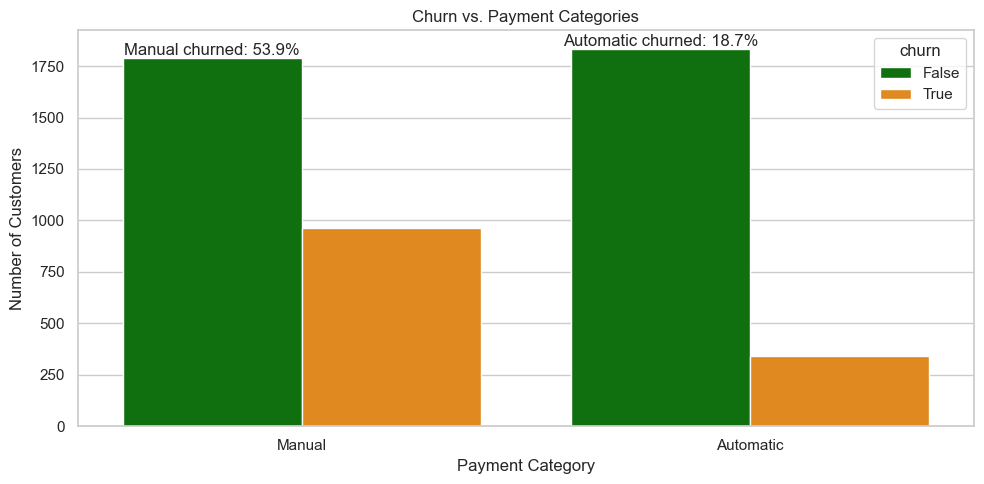

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

# Create a temporary column for payment categories
train['payment_category'] = train.apply(lambda row: 'Automatic' if row['payment_credit_card'] or row['payment_bank_transfer'] else 'Manual', axis=1)

# Create a bar plot for payment categories and churn rates
ax = sns.countplot(x='payment_category', hue='churn', data=train, palette=["green", "darkorange"])
plt.title("Churn vs. Payment Categories")
plt.xlabel("Payment Category")
plt.ylabel("Number of Customers")

# Calculate churned percentage and annotate the churned bars with percentage labels
total_manual_churned = train[(train['payment_category'] == 'Manual') & (train['churn'] == True)]['churn'].count()
total_manual_unchurned = train[(train['payment_category'] == 'Manual') & (train['churn'] == False)]['churn'].count()

total_automatic_churned = train[(train['payment_category'] == 'Automatic') & (train['churn'] == True)]['churn'].count()
total_automatic_unchurned = train[(train['payment_category'] == 'Automatic') & (train['churn'] == False)]['churn'].count()

for p in ax.patches:
    if p.get_height() > 0:
        if p.get_x() < 0.5 and p.get_height() > total_manual_churned:
            percentage = total_manual_churned / total_manual_unchurned * 100
            label = f"Manual churned: {percentage:.1f}%"
            ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

        elif p.get_x() > 0.5 and p.get_height() > total_automatic_churned:
            percentage = total_automatic_churned / total_automatic_unchurned * 100
            label = f"Automatic churned: {percentage:.1f}%"
            ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Remove the temporary column
train.drop(columns=['payment_category'], inplace=True)

plt.tight_layout()
plt.show()


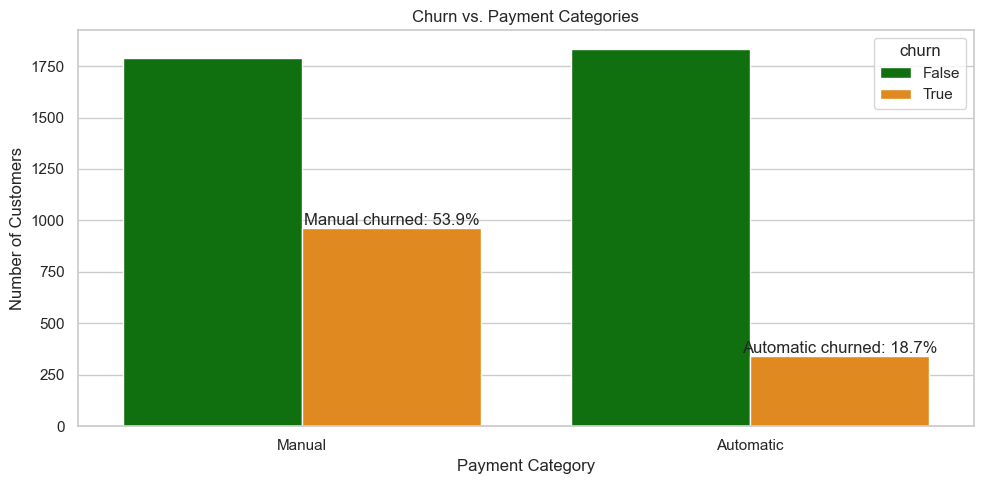

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

# Create a temporary column for payment categories
train['payment_category'] = train.apply(lambda row: 'Automatic' if row['payment_credit_card'] or row['payment_bank_transfer'] else 'Manual', axis=1)

# Create a bar plot for payment categories and churn rates
ax = sns.countplot(x='payment_category', hue='churn', data=train, palette=["green", "darkorange"])
plt.title("Churn vs. Payment Categories")
plt.xlabel("Payment Category")
plt.ylabel("Number of Customers")

# Calculate churned percentage and annotate the churned bars with percentage labels
total_manual_churned = train[(train['payment_category'] == 'Manual') & (train['churn'] == True)]['churn'].count()
total_manual_unchurned = train[(train['payment_category'] == 'Manual') & (train['churn'] == False)]['churn'].count()

total_automatic_churned = train[(train['payment_category'] == 'Automatic') & (train['churn'] == True)]['churn'].count()
total_automatic_unchurned = train[(train['payment_category'] == 'Automatic') & (train['churn'] == False)]['churn'].count()

for p in ax.patches:
    if p.get_height() > 0:
        if p.get_x() < 0.5:  # Manual category
            if p.get_height() < total_manual_unchurned:
                percentage = total_manual_churned / total_manual_unchurned * 100
                label = f"Manual churned: {percentage:.1f}%"
                ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
        else:  # Automatic category
            if p.get_height() < total_automatic_unchurned:
                percentage = total_automatic_churned / total_automatic_unchurned * 100
                label = f"Automatic churned: {percentage:.1f}%"
                ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Remove the temporary column
train.drop(columns=['payment_category'], inplace=True)

plt.tight_layout()
plt.show()
